## Project Cardiovascular Disease

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Lets load the dataset

In [2]:
df=pd.read_csv("cardio_train.csv", sep=";")

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Information of dataset

1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code |
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |
10.	Alcohol intake | Subjective Feature | alco | binary |
11.	Physical activity | Subjective Feature | active | binary |
12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [4]:
## Converting Age from number of days to years
df['age']=round(df['age'].div(365))
df['age']=df['age'].astype(int)

In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,62,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,40,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int32
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int32(1), int64(11)
memory usage: 6.6 MB


In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no missing values in our dataset.

In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,53.338177,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,6.765427,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.drop(['id'],axis=1,inplace=True)

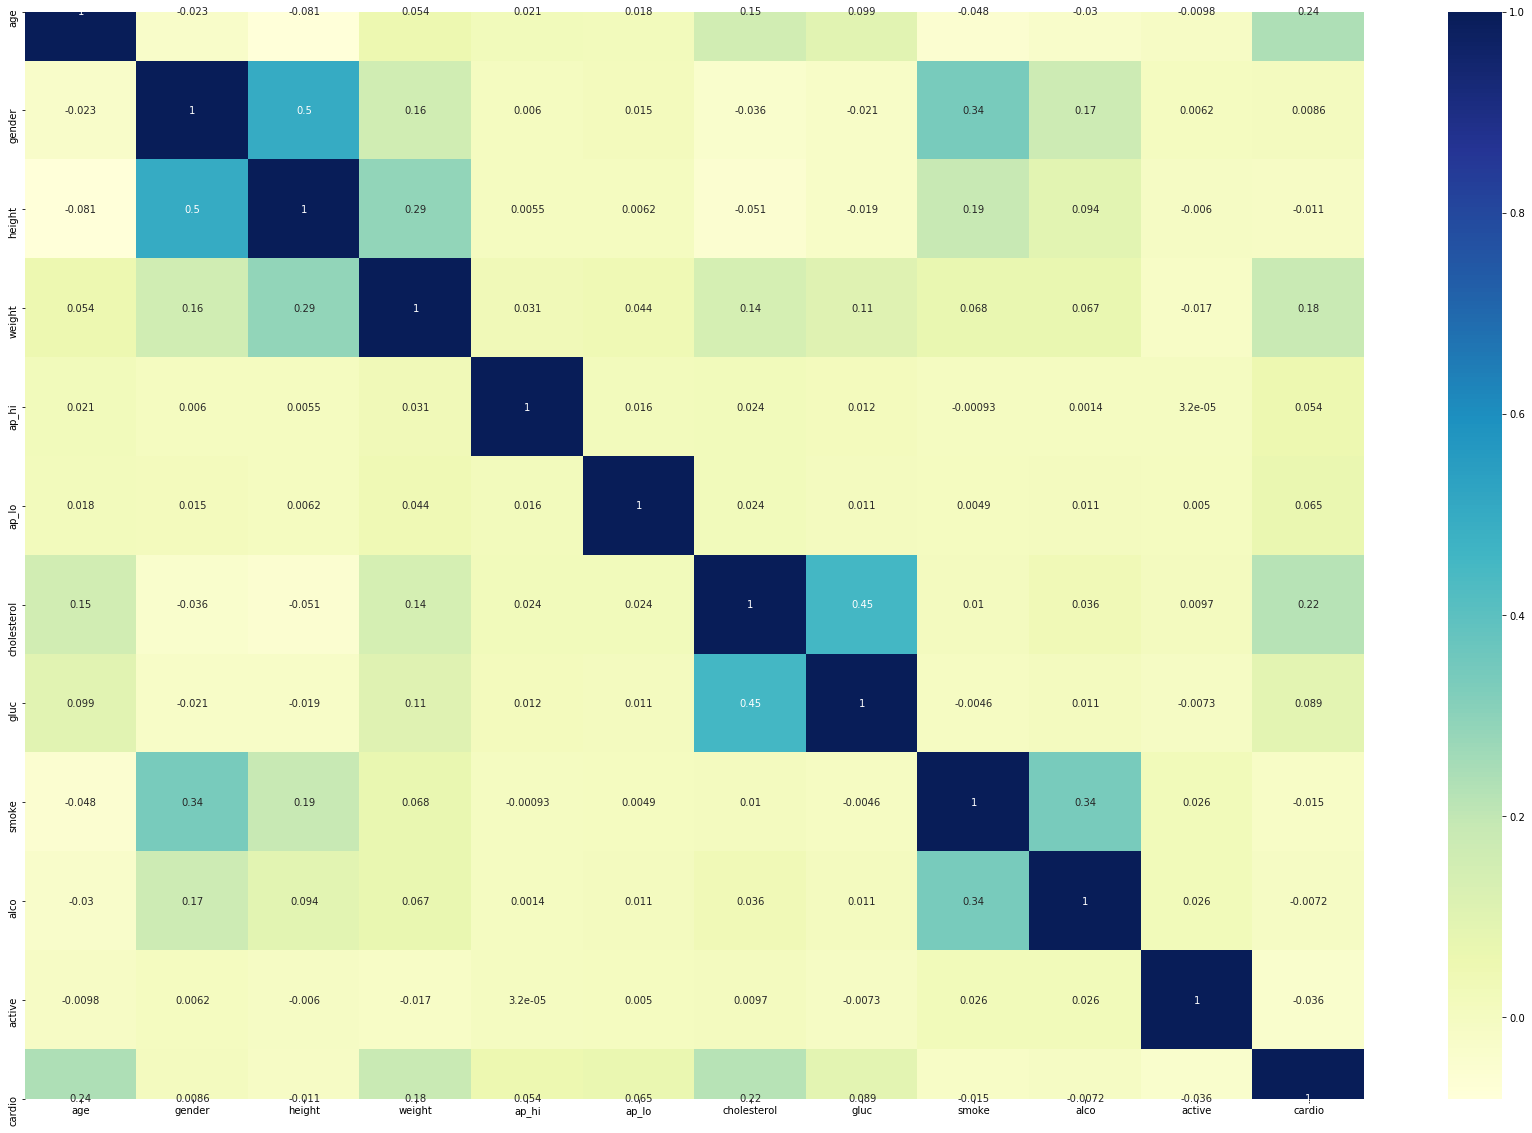

In [10]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')

From the above heatmap we can see a alot of information about the dataset, so we can see that only few columns like age,weight,cholesterol,gluc are postively correlated with our target variable, and cholestrol and gluecose is highly correlated with eachother and somke and alco was highly correlated with eachother.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220156D6D88>,
      dtype=object)

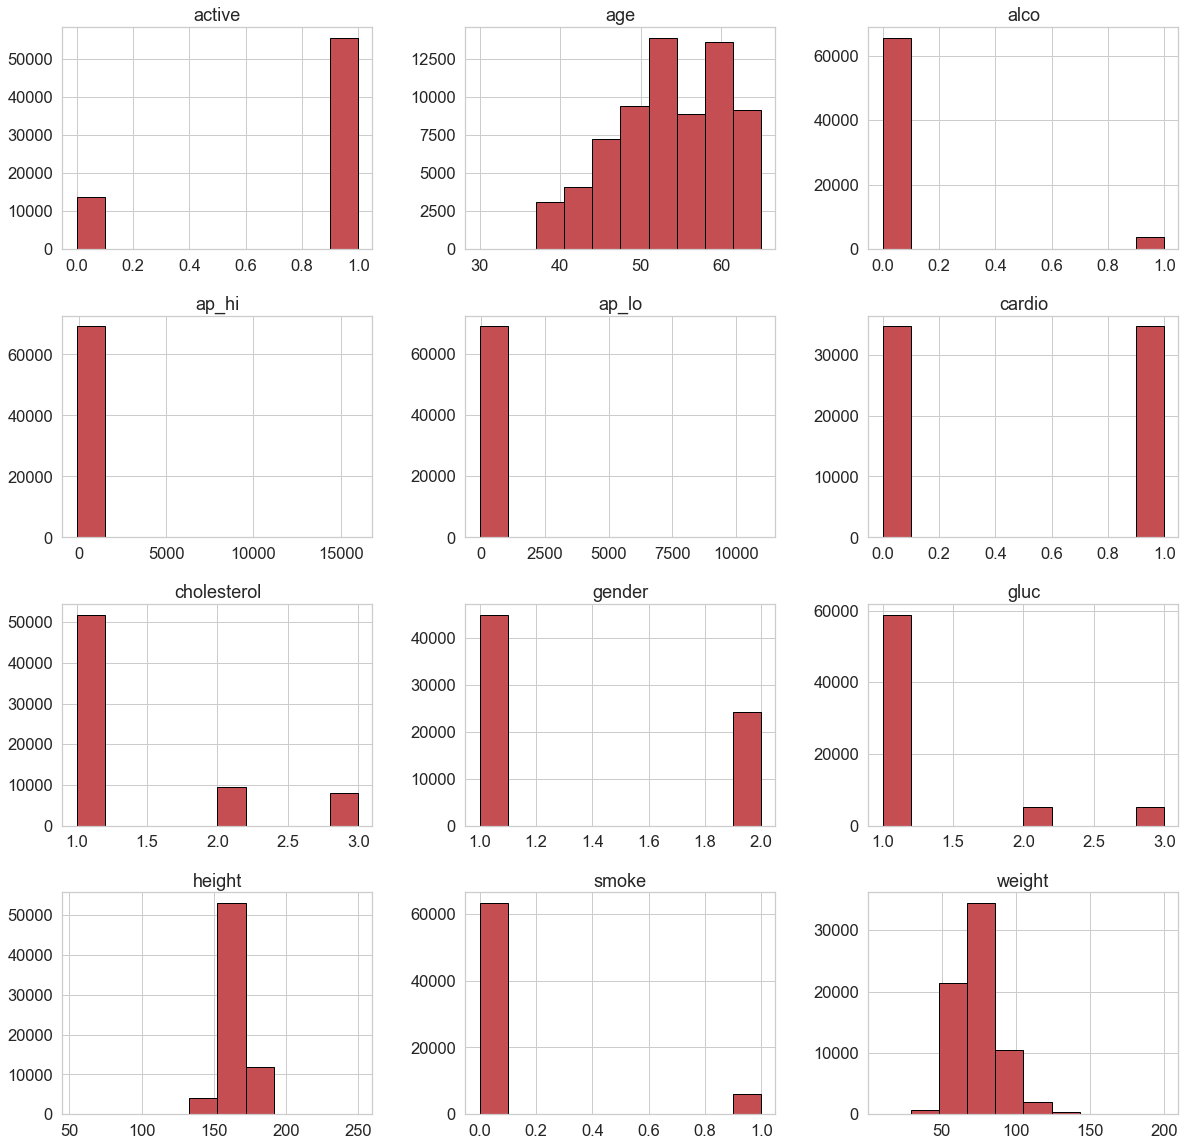

In [11]:
sns.set(style='whitegrid', palette='deep', font_scale=1.5)
df.hist(figsize=(20,20), color='r',edgecolor="black",linewidth=1)

From the above we can see most of our data is evenly distributed except age, and weight

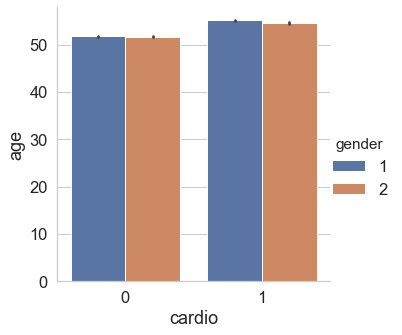

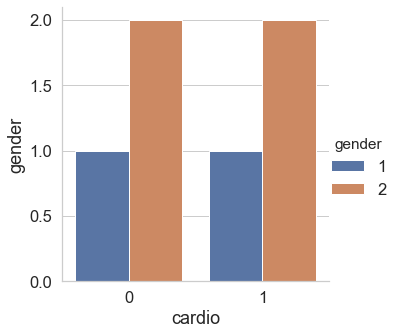

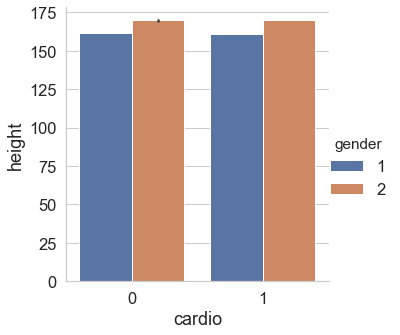

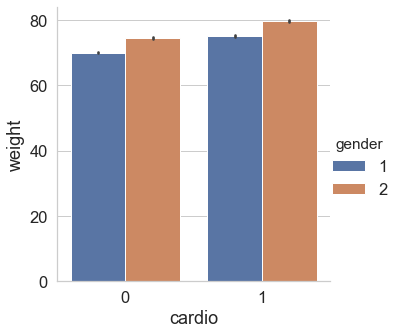

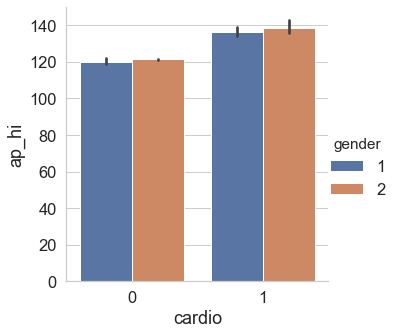

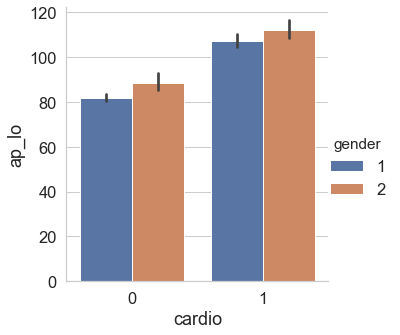

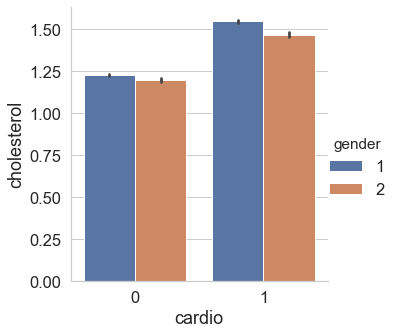

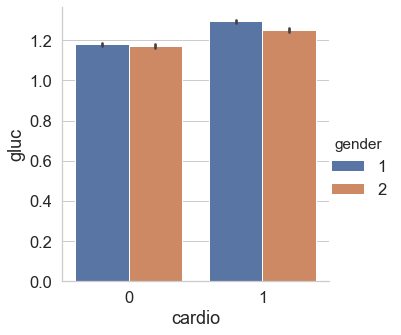

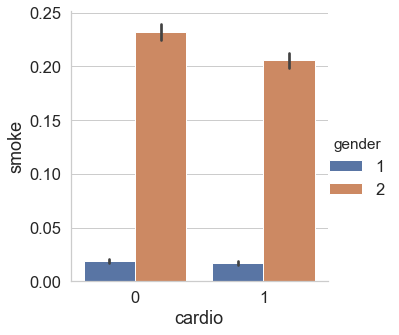

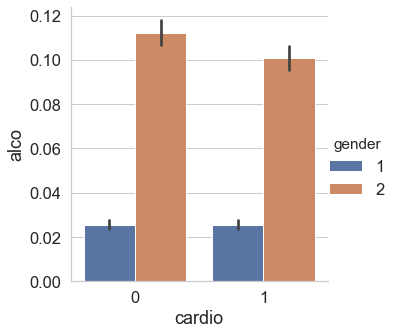

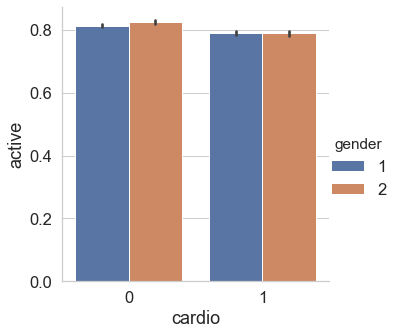

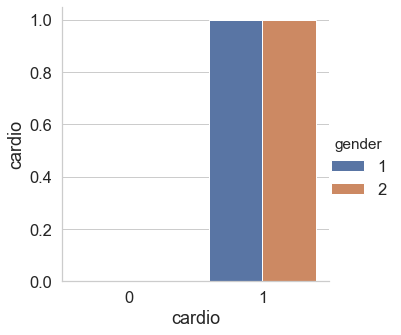

In [12]:
for cat in df:
    sns.catplot(x='cardio',y=cat,hue='gender',data=df,kind='bar')

From the above we can see a lot of detail as high cholestrol, distabolic blood pressure, systabolic blood pressure, and gluecose leads to cardiovascular disease.

In [13]:
## lets check if our dataset is balanced or not, however it should have been checked first
df['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

so from the above we can see that the our dataset is balanced dataset.

In [14]:
x=df.iloc[:,:-1]

In [15]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,62,1,155,69.0,130,80,2,2,0,0,1
1,40,1,163,71.0,110,70,1,1,0,0,1
2,60,1,165,70.0,120,80,1,1,0,0,1
3,40,2,165,85.0,120,80,1,1,1,1,1
4,64,1,155,62.0,120,80,1,1,0,0,1


In [16]:
#x.reshape(-1,1)

In [17]:
y=df['cardio']

In [18]:
x.shape,y.shape

((69301, 11), (69301,))

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((55440, 11), (13861, 11), (55440,), (13861,))

## Lets Implement ML Alogrithms

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [23]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [24]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.6460572830243129


Cross_Val_Score =  0.6525015605421878


roc_auc_score =  0.6456512391908023


classification_report
               precision    recall  f1-score   support

           0       0.65      0.66      0.66      7100
           1       0.64      0.63      0.63      6761

    accuracy                           0.65     13861
   macro avg       0.65      0.65      0.65     13861
weighted avg       0.65      0.65      0.65     13861



[[4702 2398]
 [2508 4253]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf

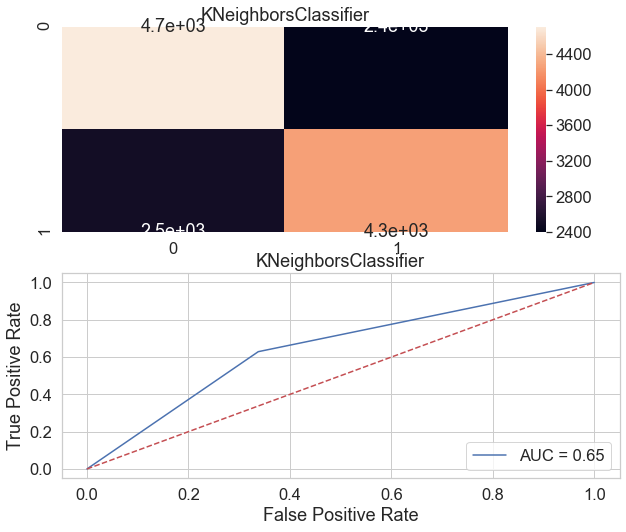

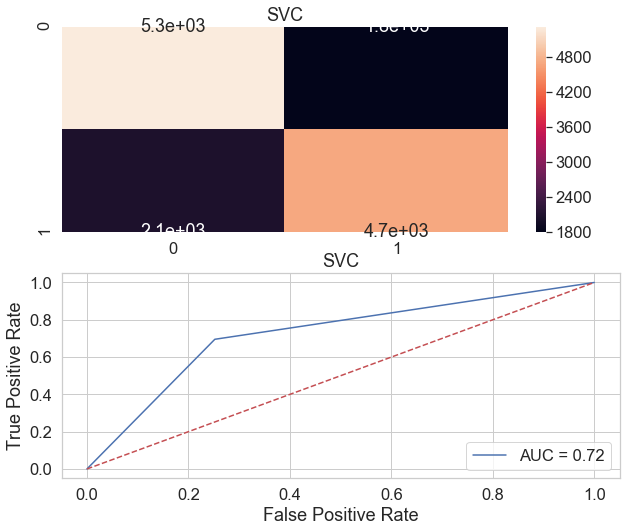

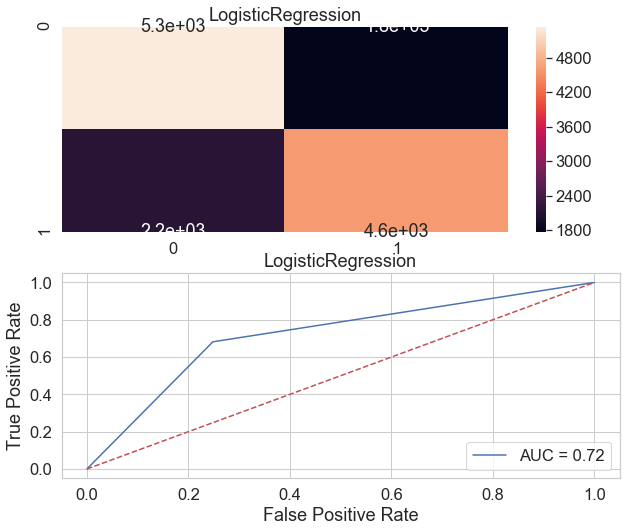

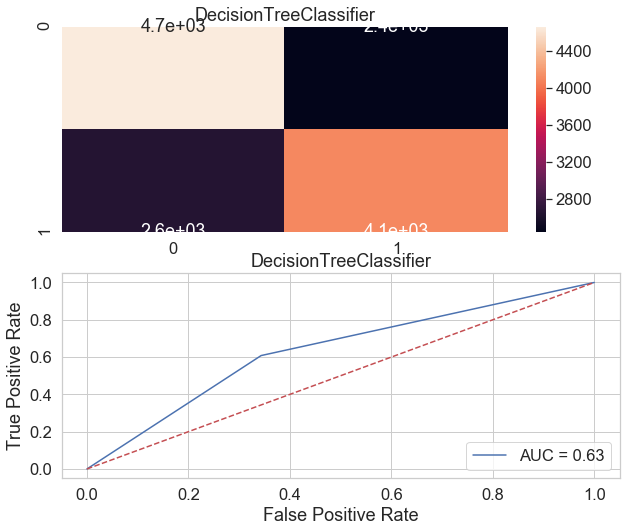

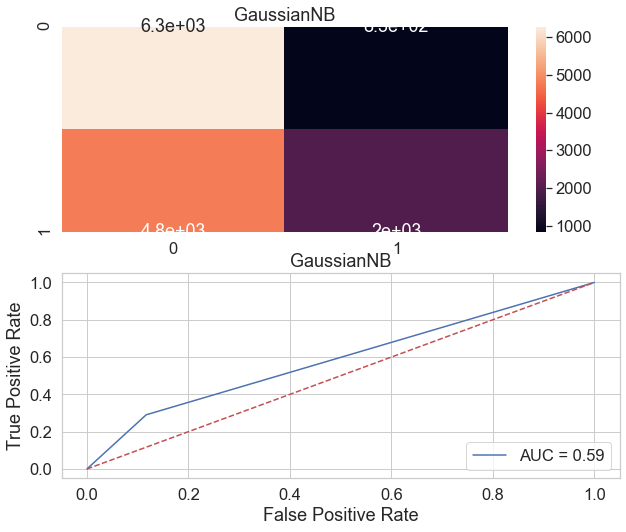

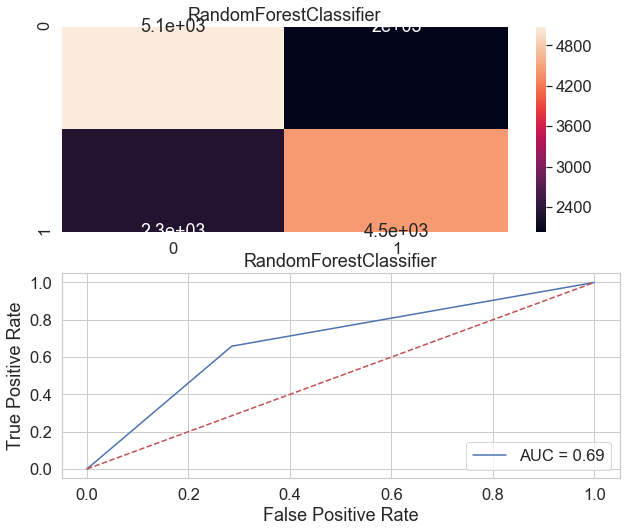

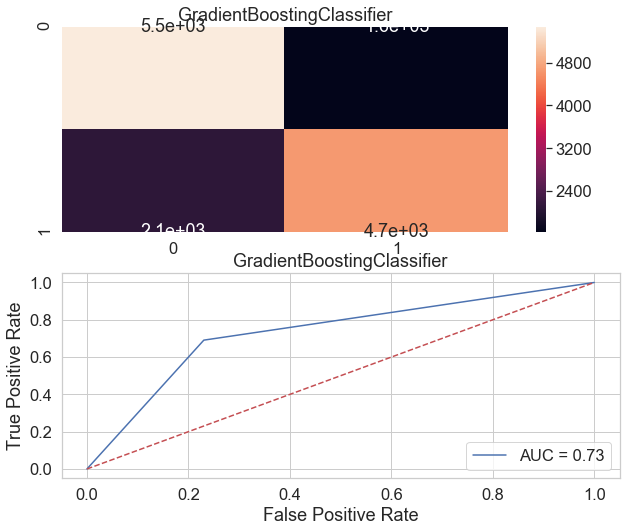

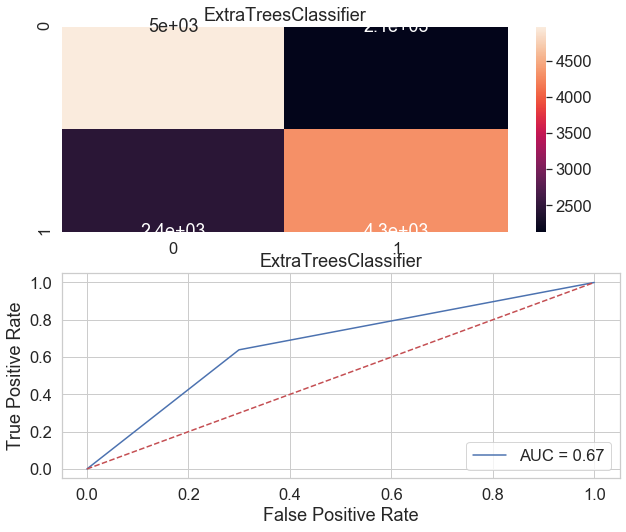

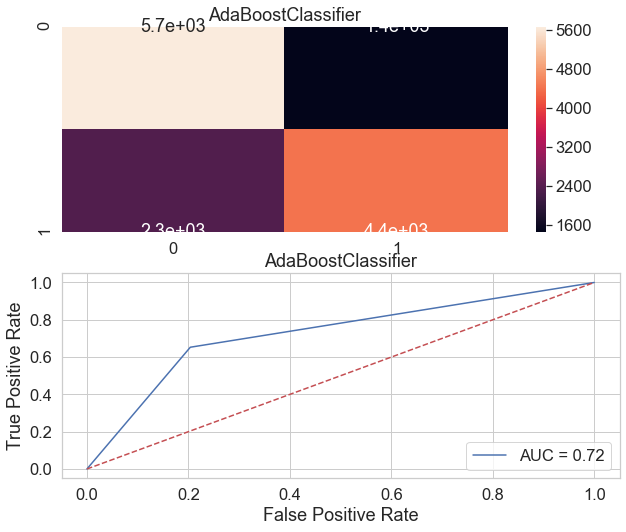

In [25]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [26]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,64.605728,65.250156,64.565124
1,SVC,72.231441,72.757988,72.167329
2,LogisticRegression,71.769714,72.059583,71.684492
3,DecisionTreeClassifier,63.299906,63.550306,63.240689
4,GaussianNB,59.411298,59.064088,58.686450
5,RandomForestClassifier,68.717986,69.019206,68.649476
6,GradientBoostingClassifier,73.118823,73.527094,73.022580
7,ExtraTreesClassifier,67.037010,67.706109,66.962021
8,AdaBoostClassifier,72.628238,72.925360,72.452959


## HyperParameter Tunning.

In [27]:
param_test ={
    "n_estimators"     :[100,250,500],
    "learning_rate"    :[0.01,0.001],
    "min_samples_split":[2,4,8],
    "min_samples_leaf" :[1,3,5]
    }

In [28]:
from sklearn.model_selection import GridSearchCV 
tunning = GridSearchCV(GBC,param_test,cv=10)
tunning.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...ge=None,
                                                  presort='a

In [29]:
tunning.best_score_ , tunning.best_params_

(0.7352453102453103,
 {'learning_rate': 0.01,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 500})

From the above we can see that even after hypertunning the model we can achived only 73%, as for detection we will need some more feature columns as its related to patients need to be atleast 98%. 